# Reporte 7

**Nombre:** Héctor Delgado Alfaro

**Código:** 20200449

**PARTE 1: LECTURA**

En el paper titulado "‘The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment" se preguntan por los efectos de niños en los ingresos futuros teniendo en cuenta una mudanza a un barrio con menor índice de pobreza (medido en cuanto es el ingreso monetario).La muestra fue de 4604 viviendas en Estados Unidos entre familias a las que se ofrecio cheques para mudarse y a familias a las que no.


El articulo tiene varias fortalezas, en primer lugar, se tiene en cuenta la data administrativa aleatoria que no hace una selección de los datos a emplear.Por otro lado, el empleo de literatura previa que aborda la problemática ayuda a conocer que este tema es de relevancia. Finalmente, la metodologia empleada por el autor es muy util ya que se utiliza una estimación de efectos, eliminación de errores estándar e identificación de impacto causal. En terminos de debilidades se puede decir que el no haber tenido en cuenta variables externas que pueden afectar el desarrollo de los niños y aislarlas. Por ejemplo, el acceso a servicios basicos y acceso a servicios de mudanza. Otra debilidad la identifican los mismos autores que si bien la hipotesis se comprobo, no se pudo probar una edad estandar que indique un límite en la edad en que niños se pueden beneficiar de la mudanza por el tamaño insuficiente de la muestra.

El aporte del paper recae en que se logra comprobar como afecta positivamente el mudarte a barrios "buenos" teniendo en cuenta la importancia de la edad al tiempo de la mudanza como variable y su repercusión en la educación. En ese sentido este estudio permite evaluar al Estado como afecta el lugar de vivienda en servicios basicos. Un paso para avanzar en dicha investigación es identificar los factores que determinan porque algunos barrios son mejores que otros, por ejemplo, Amartya Sen hace enfasis en la importancia de la desigualdad de recursos como causal de la diferencia entre los barrios y sus efectos en el desarrollo humano.


**PARTE 2: CÓDIGO**

In [ ]:
pip install plotnine

In [4]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import pylab as plt
from causalgraphicalmodels import CausalGraphicalModel
import os
from statsmodels.iolib.summary2 import summary_col
import statistics

Primero traemo la data del laboratorio 10 y lo llamaremos data1.

In [11]:
data1 = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data1.shape)
data1.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [24]:
data2 = (data1
 .assign(class_format = np.select(
     [data1["format_ol"].astype(bool), data1["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" )))

In [25]:
data2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [27]:
data3 = pd.get_dummies(data2)

In [28]:
data3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


Con esta data podemos hacer los **$Histogramas$**

Text(0.5, 1.0, 'Lecciones Online')

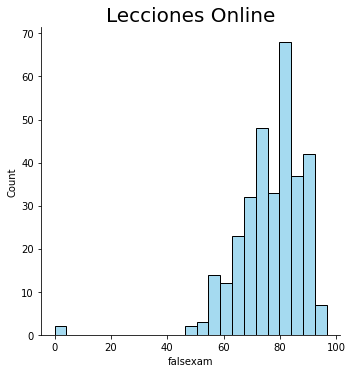

In [33]:
sns.displot(data3, x="falsexam", color="skyblue")
plt.title("Lecciones Online", fontsize=20)

Text(0.5, 1.0, 'Presencial')

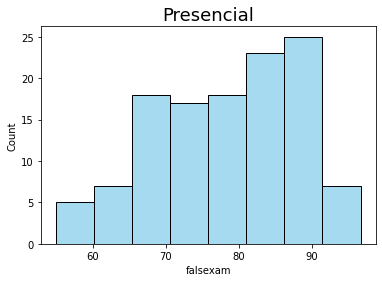

In [41]:
sns.histplot(data=data3[data3['class_format_face_to_face']==1], x='falsexam', color="skyblue")
plt.title("Presencial", fontsize=18)

Text(0.5, 1.0, 'Formato Mixto')

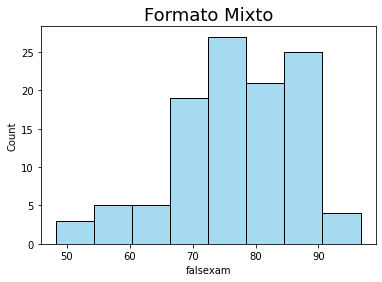

In [43]:
sns.histplot(data=data3[data3['class_format_blended']==1], x='falsexam', color="skyblue")
plt.title("Formato Mixto", fontsize=18)

$Analisis$

Los tres histogramas presentan diferencias entre uno y otro. En primer lugar en el caso de las clases virtuales existen valores atipicos que se alejan mucho del promedio,ademas hay una tendencia a valores más bajos. Por otro lado, los valores mas altos se encuentran en clases presenciales. Esto se debe a los multiples factores distractores y problemas de conexión que las clases virtuales presentan a diferencia de las presenciales.

**Difference-in-means estimator.**

Ahora solo se van a concentrar en los grupos face-to-face y online lessons. Para ello pueden seguir estos pasos:

Crear un nuevo dataset donde solo incluyan estos dos grupos
Calculan el promedio del grupo online lessons
Calculan el primdeio del grupo face-to-face
Toman la diferencia entre el valor encontrado en 2 y el valor en 3.
¿Cuál es su interpretación del resultado encontrado?

In [44]:
data4 = pd.DataFrame(data3, columns=['class_format_online', 'class_format_face_to_face', 'falsexam'])

In [45]:
data4

,class_format_online,class_format_face_to_face,falsexam
0,0,1,63.29997
1,0,1,79.96000
2,0,0,83.37000
3,0,0,90.01994
4,1,0,83.30000
...,...,...,...
318,0,0,68.36000
319,1,0,70.05000
320,1,0,66.69000
321,1,0,83.29997


In [52]:
data5 = (data4 .assign(class_format_2 = np.select(
     [data4["class_format_face_to_face"].astype(bool), data["class_format_online"].astype(bool)],
     ["face-to-face", "online"],)))

In [53]:
data5

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
2,0,0,83.37000,0
3,0,0,90.01994,0
4,1,0,83.30000,online
...,...,...,...,...
318,0,0,68.36000,0
319,1,0,70.05000,online
320,1,0,66.69000,online
321,1,0,83.29997,online


**Media**

In [58]:

index = data5[(data5['class_format_2']=="0")].index

In [59]:
data6=data5.drop(index)

In [60]:
data6

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
4,1,0,83.30000,online
5,1,0,88.34996,online
7,0,1,90.00000,face-to-face
...,...,...,...,...
316,0,1,91.65000,face-to-face
317,0,1,84.99000,face-to-face
319,1,0,70.05000,online
320,1,0,66.69000,online


In [61]:
data6.groupby('class_format_online').mean()

,class_format_face_to_face,falsexam
class_format_online,,
0,1.0,78.547485
1,0.0,73.635263


La diferencia da -4.912222 lo que se puede interpretar como que los estudiantes rinden 4.91 menos en clases virtuales

**Difference-in-means estimator via linear regression**

Ahora van a utilizar una regresión lineal para encontrar lo mismo que en el apartado de arriba. Pueden seguir estos pasos

Deben crear una variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.
Luego deben realizar una regresion lineal donde Y = Las notas, T = Dummy creada para el tipo de clase.
Esta regresion es de la siguente manera Y = beta_0 + beta_1*T + e. El valor que encuentren para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.
¿Cuál es su interpretación del resultado encontrado?

In [63]:
data7 = (data6 .assign(class_format_2 = np.select(
     [data6["class_format_face_to_face"].astype(bool), data6["class_format_online"].astype(bool)],
     ["0", "1"])))

In [64]:
data7

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,0
1,0,1,79.96000,0
4,1,0,83.30000,1
5,1,0,88.34996,1
7,0,1,90.00000,0
...,...,...,...,...
316,0,1,91.65000,0
317,0,1,84.99000,0
319,1,0,70.05000,1
320,1,0,66.69000,1


In [66]:
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_2", 
              data = data6).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        21:27:56   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   78.5475      1.113     70.563      0.000      76.353      80.742
class_format_2[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""